## Проект 2. Разведывательный анализ данных

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import math

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

students = pd.read_csv('stud_math.csv')

### Первичный осмотр данных

Рассмотрим какие данные содержатся в файле

In [170]:
display(students.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Посмотрим на типы данных

In [171]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Таким образов в нашем датасете содержится
* 395 строк
* 30 столбцов, из которых:
    * 13 числовых
    * 17 строковых

### Первичный анализ данных в столбцах

Для удобства в дальнейшей работе с датасетом, переименуем столбцы, приведя их имена к единому стандарту:

In [172]:
students.columns = [
    'school',
    'sex',
    'age',
    'address_type',
    'family_size',
    'parents_status',
    'mother_edu',
    'father_edu',
    'mother_job',
    'father_job',
    'reason',
    'guardian ',
    'traveltime',
    'studytime',
    'failures',
    'schoolsup',
    'family_support',
    'paid',
    'activities',
    'nursery',
    'studytime_granular',
    'higher_edu',
    'internet',
    'romantic',
    'family_rel',
    'freetime',
    'go_out',
    'health',
    'absences',
    'score'
]

Рассмотрим все столбцы по отдельности

#### School

Выясним сколько различных школ содержится в датасете:

,school
GP,349
MS,46


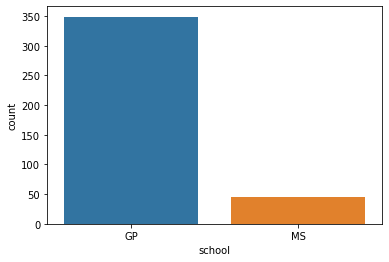

In [173]:
display(pd.DataFrame(students.school.value_counts()))
display(sns.countplot(x='school', data=students))

Всего 2 школы. Пустые значения отсутствуют. Данныую колонку будем считать подготовленной для анализа и пойдем дальше.

#### Sex
Посмотрим на соотношение полов среди учеников.

In [174]:
pd.DataFrame(students.sex.value_counts())

,sex
F,208
M,187


Видим, что пустые и некорректные данных отсутствуют. В предтставленном наборе данных парней несколько больше, чем девушек.
Переходим к следуюущему столбцу.

#### Age
Посмотрим на распределение возраста учеников в датасете.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

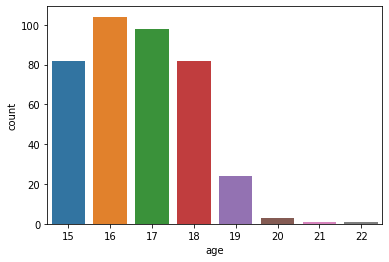

In [175]:
display(students.age.describe())
display(students.age.value_counts())
sns.countplot(x='age', data=students)

#### Address type
Посмотрим какая часть учащихся живет в городе, а какая за городом

Проверим емеются ли у нас пропущенные значения:

In [176]:
students.address_type = students.address_type.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.address_type.value_counts()))

,address_type
U,295
R,83
nan,17


Как видим, у нас присутствуют неопределенные значения типа адреса студентов.
Давайте определим их, исходя из времени, которое ученик тратит на дорогу до школы.
Примем, что ученики, живущие в городе тратят на дорогу до школы менее 15 минут. Если значение времени на дорогу не указано, заменяем пустое значение на моду.

In [191]:
def address_type_hadler(row, most_frequent_value):
    if str(row.address_type) == 'nan':
        if math.isnan(row.traveltime):
            return most_frequent_value
        else:
            if int(row.traveltime) > 1:
                return 'R'
            else:
                return 'U'
    else:
        return row.address_type
 
students.address_type = students.apply(address_type_hadler, axis=1, args=(students.address_type.value_counts().idxmax()))
display(pd.DataFrame(students.address_type.value_counts()))

,address_type
U,306
R,89


#### Traevel time

Проверяем емеются ли у нас пропущенные значения:

In [160]:
students.traveltime = students.traveltime.apply(lambda x: 0.0 if math.isnan(x) else x)
display(pd.DataFrame(students.traveltime.value_counts()))

,traveltime
1.0,242
2.0,96
0.0,28
3.0,22
4.0,7


Непределенные значение присутствуют.
Присвоим им значение исходя из адреса ученика.
Примем значение 1.0 в случае, если ученик живет в городе и 2.0 - если за городом

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


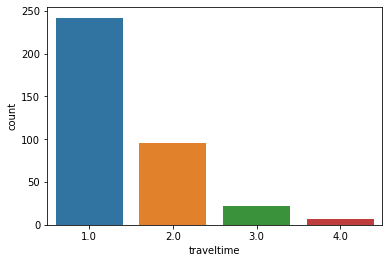

In [183]:
def traveltime_hadler(row):
    if (row.traveltime) == 0.0:        
        if row.address_type == 'U':
            return 1.0
        else:
            return 2.0
    else:
        return row.traveltime
    
students.traveltime = students.apply(traveltime_hadler, axis=1)
display(pd.DataFrame(students.traveltime.value_counts()))
sns.countplot(x='traveltime', data=students)

#### Family size
Рссмотрим распределение студентов по размеру семьи

In [44]:
students.family_size = students.family_size.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.family_size.value_counts()))

,family_size
GT3,261
LE3,107
nan,27


#### Parents status


In [46]:
students.parents_status = students.parents_status.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.parents_status.value_counts()))

,parents_status
T,314
nan,45
A,36


In [195]:
def family_size_handler(row):
    if row.family_size == 'nan':
        if row.parents_status == 'nan':
            return 'GT3'
        else:
            if int(row.parents_status) == 'T':
                return 'GT3'
            else:
                return 'LE3'
    else:
        return row.address_type


students.family_size = students.apply(family_size_handler, axis=1)
display(pd.DataFrame(students.family_size.value_counts()))

,family_size
U,306
R,89


#### Mother education
Образование матери

In [47]:
display(pd.DataFrame(students.mother_edu.value_counts()))

,mother_edu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
